In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
#Read csv data
census = pd.read_csv("Census.csv")
census1 = census.copy()
census1.head()

,Person ID,Region,Residence Type,Family Composition,Population Base,Sex,Age,Marital Status,Student,Country of Birth,Health,Ethnic Group,Religion,Economic Activity,Occupation,Industry,Hours worked per week,No of hours,Approximated Social Grade
0,7394816,E12000001,H,2,1,2,6,2,2,1,2,1,2,5,8,2,-9,NaN,4
1,7394832,E12000001,H,3,1,2,1,1,2,1,2,1,1,-9,-9,-9,-9,NaN,-9
2,7394719,E12000001,H,2,1,1,7,2,2,1,1,1,2,5,8,2,-9,NaN,2
3,7394840,E12000001,H,1,1,2,6,4,2,1,3,1,2,5,9,5,-9,NaN,4
4,7394711,E12000001,H,2,1,1,1,1,1,1,1,1,1,-9,-9,-9,-9,NaN,-9


In [17]:
census1['Region'] = LabelEncoder().fit_transform(census1['Region'])
census1['Residence Type'] = LabelEncoder().fit_transform(census1['Residence Type'])
census1['Family Composition'] = census1['Family Composition'].replace(-9, 0)
census1['Country of Birth'] = census1['Country of Birth'].replace(-9, 0)
census1['Health'] = census1['Health'].replace(-9, 0)
census1['Ethnic Group'] = census1['Ethnic Group'].replace(-9, 0)
census1['Religion'] = census1['Religion'].replace(-9, 0)
census1['Economic Activity'] = census1['Economic Activity'].replace(-9, 0)
census1['Occupation'] = census1['Occupation'].replace(-9, 0)
census1['Industry'] = census1['Industry'].replace(-9, 0)
census1['Hours worked per week'] = census1['Hours worked per week'].replace(-9, 0)
census1['Approximated Social Grade'] = census1['Approximated Social Grade'].replace(-9, 0)
census1['No of hours'].fillna(0, inplace=True)

In [18]:
census1.keys()

Index(['Person ID', 'Region', 'Residence Type', 'Family Composition',
       'Population Base', 'Sex', 'Age', 'Marital Status', 'Student',
       'Country of Birth', 'Health', 'Ethnic Group', 'Religion',
       'Economic Activity', 'Occupation', 'Industry', 'Hours worked per week',
       'No of hours', 'Approximated Social Grade'],
      dtype='object')

In [19]:
census1.isna().sum()

Person ID                    0
Region                       0
Residence Type               0
Family Composition           0
Population Base              0
Sex                          0
Age                          0
Marital Status               0
Student                      0
Country of Birth             0
Health                       0
Ethnic Group                 0
Religion                     0
Economic Activity            0
Occupation                   0
Industry                     0
Hours worked per week        0
No of hours                  0
Approximated Social Grade    0
dtype: int64

In [20]:
y = census1['No of hours']
X1 = census1.drop(columns=['No of hours', 'Person ID', 'Hours worked per week'])

In [21]:
def perform_linear_regression(X, y, test_size=0.2, random_state=12):
    # Split the data into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit the linear regression model
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # Make predictions on the test set
    lr_y_pred = lr_model.predict(X_test)

    # Evaluate the model
    lr_mse = mean_absolute_error(y_test, lr_y_pred)
    lr_r2 = r2_score(y_test, lr_y_pred)

    # Coefficients of the linear regression model
    lr_intercept = lr_model.intercept_
    lr_coefficients = lr_model.coef_

    coef = lr_model.coef_
    feature_names = X.columns
    plt.barh(feature_names, coef)
    plt.xlabel("Coefficient Value")
    plt.title("Feature Coefficients")
    plt.show()

    return {
        "LR - Mean Absolute Error": lr_mse,
        "LR - R-squared": lr_r2,
        "LR - Intercept": lr_intercept,
    }

In [22]:
def perform_scaled_linear_regression(X, y, test_size=0.2, random_state=12):
    # Split the data into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Preprocess categorical variables using Label Encoding and standardize numeric variables
    categorical_cols = X.select_dtypes(include=['object']).columns
    numeric_cols = X.select_dtypes(exclude=['object']).columns

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_cols),
            ('cat', LabelEncoder(), categorical_cols)
        ])

    # Create a linear regression model and build a pipeline
    scale_lr_model = LinearRegression()
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', scale_lr_model)
    ])

    # Fit the model to the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    scale_lr_mse = mean_absolute_error(y_test, y_pred)
    scale_lr_r2 = r2_score(y_test, y_pred)
    coef = scale_lr_model.coef_
    Scale_lr_intercept = scale_lr_model.intercept_
    feature_names = X.columns
    plt.barh(feature_names, coef)
    plt.xlabel("Coefficient Value")
    plt.title("Feature Coefficients")
    plt.show()

    return {
        "Scaled_lr - Mean Absolute Error": scale_lr_mse,
        "Scaled_lr - R-squared": scale_lr_r2,
        "Scaled_lr - Intercept": Scale_lr_intercept
    }

In [23]:
def perform_decision_tree_regression(X, y, test_size=0.2, random_state=12):
    # Split the data into a training set and a testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Create and fit the Decision Tree Regression model
    r_tree_model = DecisionTreeRegressor(random_state=random_state)
    r_tree_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = r_tree_model.predict(X_test)

    # Evaluate the model
    r_tree_mse = mean_absolute_error(y_test, y_pred)
    r_tree_r2 = r2_score(y_test, y_pred)

    return {
        "Mean Absolute Error": r_tree_mse,
        "R-squared": r_tree_r2,
        "Model": r_tree_model 
    }

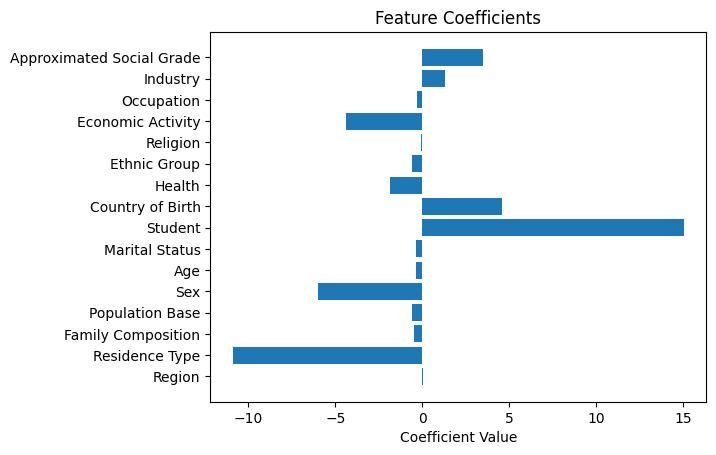

{'LR - Mean Absolute Error': 10.999564229624966,
 'LR - R-squared': 0.5256607431545115,
 'LR - Intercept': 11.072428487769084}

In [24]:
perform_linear_regression(X1, y)

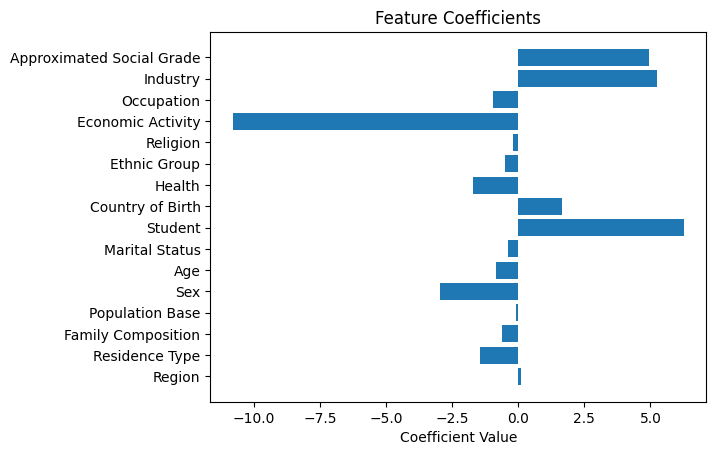

{'Scaled_lr - Mean Absolute Error': 11.007560259520744,
 'Scaled_lr - R-squared': 0.5268442417886853,
 'Scaled_lr - Intercept': 16.529778934250707}

In [25]:
perform_scaled_linear_regression(X1, y)

In [26]:
perform_decision_tree_regression(X1, y)

{'Mean Absolute Error': 5.458144003677429,
 'R-squared': 0.7274799233738509,
 'Model': DecisionTreeRegressor(random_state=12)}

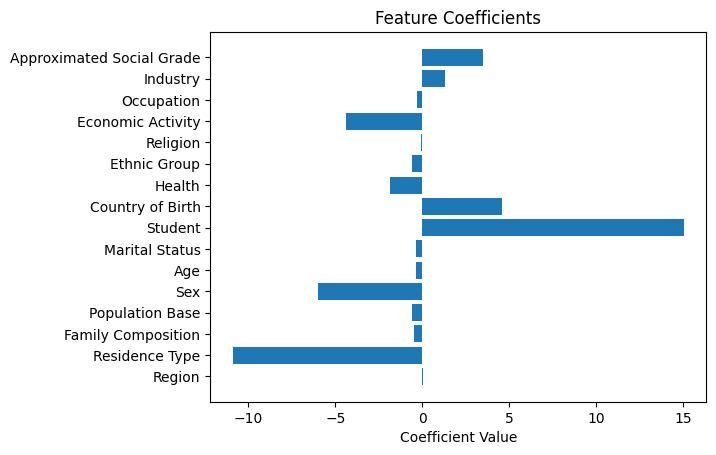

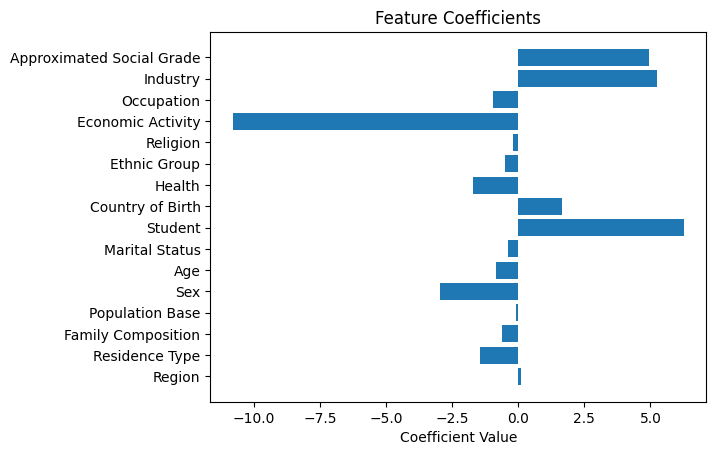

In [27]:
# Perform Linear Regression
linear_results = perform_linear_regression(X1, y)

# Perform Decision Tree Regression
decision_tree_results = perform_decision_tree_regression(X1, y)

# Perform Scaled Linear Regression
scaled_linear_results = perform_scaled_linear_regression(X1, y)

# Extract MSE and R2 values
linear_mse = linear_results["LR - Mean Absolute Error"]
linear_r2 = linear_results["LR - R-squared"]
decision_tree_mse = decision_tree_results["Mean Absolute Error"]
decision_tree_r2 = decision_tree_results["R-squared"]
scaled_linear_mse = scaled_linear_results["Scaled_lr - Mean Absolute Error"]
scaled_linear_r2 = scaled_linear_results["Scaled_lr - R-squared"]

# Create bar plots to compare MSE and R2 values
methods = ['Linear Regression', 'Decision Tree Regression', 'Scaled Linear Regression']
mse_values = [linear_mse, decision_tree_mse, scaled_linear_mse]
r2_values = [linear_r2, decision_tree_r2, scaled_linear_r2]

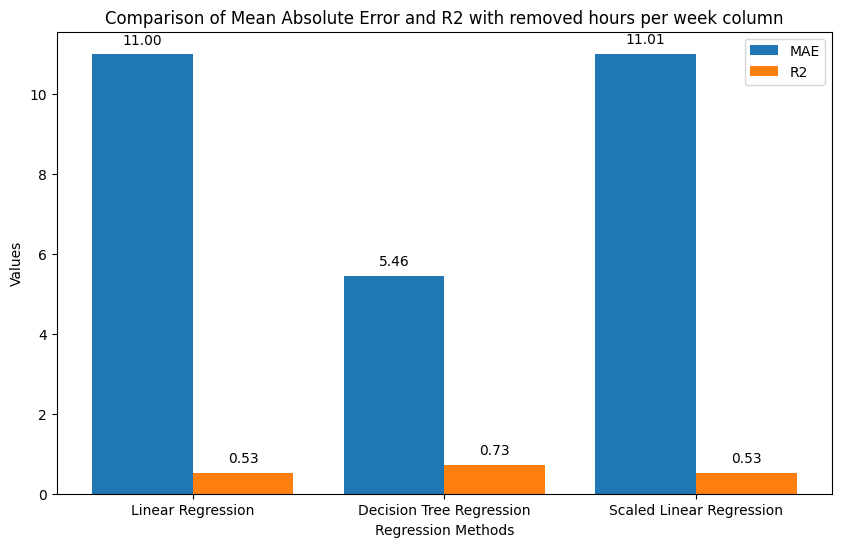

In [28]:
methods = ['Linear Regression', 'Decision Tree Regression', 'Scaled Linear Regression']
mse_values = [linear_mse, decision_tree_mse, scaled_linear_mse]
r2_values = [linear_r2, decision_tree_r2, scaled_linear_r2]

x = np.arange(len(methods))

plt.figure(figsize=(10, 6))

# Bar plots for MAE
bar1 = plt.bar(x - 0.2, mse_values, width=0.4, label='MAE')
# Bar plots for R2
bar2 = plt.bar(x + 0.2, r2_values, width=0.4, label='R2')

# Add labels to each bar
for bar in [bar1, bar2]:
    for p in bar:
        height = p.get_height()
        plt.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(x, methods)
plt.xlabel('Regression Methods')
plt.ylabel('Values')
plt.title('Comparison of Mean Absolute Error and R2 with removed hours per week column')
plt.legend()
plt.show()
